# Regresyon Modelleri

Daha önceki derslerimizde sınıflandırma yöntemlerinden karar ağaçlarını ve destek vektör makinelerini görmüştük. Bu algoritmaların nasıl çalıştığına bakmıştık. Her iki algoritmada da verilerimiz hedef değerleri ile birlikte verilmişti. Biz var olan bilgilerden yola çıkarak bir makine öğrenmesi gerçekleştirdik ardından yine veriseti içerisindeki bir takım veriyi test seti olarak kaydederek oluşturduğumuz modeli test veri seti üzerinde deneyerek ne kadar iyi sonuçlar bulduğumuzu göstermeye çalıştık. Bugün de kimi yerlerde sınıflandırmanın altında kimi yerlerde sınıflandırmadan farklı bir yöntem olarak ele alınan regresyon modellerine bakacağız. Genel regresyon denkleminde hedef değişkenleri sürekli değerler alır ve birer sınıf ifade etmezler. Ancak sürekli değişkenlerin kesikli hale getirilmesi ile regresyon modelleri sınıflandırma için kullanılabilir. Biz öncelikle genel regresyon denkleminden bahsedelim.

$Y\ =\ \beta_0+\ \beta_1\ x_1+\ \beta_2\ x_2+\ \ldots\ +\ \beta_n\ x_n$

Bu denklemde $Y$ değişkeni hedef değişkeni $X$ değişkenleri ise özellik değişkenlerini göstermektedir. $\beta$ katsayıları katsayıları sklearn içerisinde `coef_`, $\beta_0$ ise `intercept_` olarak kaydedilir. Lineer regresyon analizinde 2 boyutlu düzlemde çalışıyorsak yani bir çıktı bir de özellik değişkenimiz varsa 2 değişkeni temsil eden en iyi çizgiyi çizmeye çalışırız. 

**Lineer Regresyon**: Bağımlı bir değişken($Y$) ile bağımsız bir değişken ($X$) serisinin arasındaki ilişkinin fonksiyonel biçimi.  

**Lineer regresyon analizi**: «veriyi lineer bir çizgiye uydurma çalışması» veya «lineer modelleme»  

**$Y$**: Çıktı, bağımlı, sonuç, etkilenen değişken  
**$X$**: Girdi, bağımsız, neden(faktör), etkileyen değişken  

Regresyon sorusu: Y’nin X’e bağlı koşullarını nasıl tahmin edebiliriz sorusudur.

`from sklearn.linear_model import LinearRegression` satırıyla lineer regresyon fonksiyonu çağrılır.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Basit Lineer Regresyon Analizi
Önce basit bir lineer regresyon modelini ele alalım. Basit lineer regresyon analizinde bir adet bağımsız değişken(x) bir adet de bağımlı değişken vardır. Örnekte kullanılacak olan veri setini [şu adresten](https://drive.google.com/file/d/1ek0LwwIjWrU-SY4Wn-oi976sVOF8_X3e/view?usp=sharing) indirebilirsiniz. Verisetini pandas çerçevesine alıp regresyon modelini kuralım.

In [2]:
veriseti = pd.read_csv('data/linear_model.csv')

In [3]:
veriseti.head()

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


Görüldüğü gibi veri setinde bazı değerler eksik girilmiş. Şimdi bu değerlerin sayısına bakalım.

In [7]:
veriseti.isnull().sum()

x    0
y    8
dtype: int64

y değişkeninde 8 adet boş değer var. X değişkeninde ise boş değer yok. Y değişkenindeki boş değerleri ortalama ile dolduralım.

In [11]:
veriseti.y.fillna(value=veriseti.y.mean(), inplace=True)

Şimdi veri seti hakkında tanımlayıcı istatistik bilgilerine bakalım.

In [12]:
veriseti.describe()

,x,y
count,100.000000,100.000000
mean,52.099330,87.915132
std,29.416763,45.150390
min,0.016737,-6.236295
25%,29.012087,52.047526
50%,55.255856,87.915132
75%,77.442040,126.556343
max,99.432294,166.164544


Göze çarpan bir anormallik ya da aykırı değer olmadığı görülüyor. Şimdi verileri normalize edelim. Örneğin `MinMaxScaler` kullanarak normalizasyon gerçekleştirelim. 

In [14]:
veriseti.x = (veriseti.x - veriseti.x.min()) / (veriseti.x.max() -
                                                veriseti.x.min())
veriseti.y = (veriseti.y - veriseti.y.min()) / (veriseti.y.max() -
                                                veriseti.y.min())

Veri setini x ve Y değişkenlerine ayıralım.

In [15]:
X = veriseti.x
y = veriseti.y

X ve y arasındaki ilişkiye bakalım.

Text(0.5, 1.0, 'X y arasındaki ilişki')

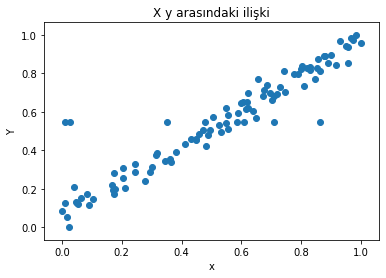

In [16]:
plt.scatter(X.values, y.values)
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y arasındaki ilişki')

Grafikte x ile y arasında pozitif yönlü doğrusal bir ilişkinin olduğu görülüyor. Şimdi en uygun çizgiyi çizdirmeye çalışalım.

In [17]:
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

Modelimiz kuruldu ve verilerimize uyduruldu. Şimdi lineer modelimizi görüntüleyelim.

In [20]:
print(lineer_regresyon.intercept_)
print(lineer_regresyon.coef_)

array([0.10692427])

In [22]:
lineer_regresyon.coef_

array([[0.83833805]])

In [25]:
print("Elde edilen regresyon modeli: Y={}+{}X".format(
    lineer_regresyon.intercept_, lineer_regresyon.coef_[0]))

Elde edilen regresyon modeli: Y=[0.10692427]+[0.83833805]X


Şimdi regresyonun performansına bakalım.

In [27]:
y_predicted = lineer_regresyon.predict(X.values.reshape(-1, 1))

In [28]:
r2_score(y, y_predicted)

0.8971708595884971

Modelimiz %89 oranında verilere uyum sağladı.

Diğer kullanabileceğimiz ölçüler:
1. Mean Absolute Error(MAE): Ortalama Mutlak Hata
$MAE = 1/n\times\sum{|y-y_{tahmin}|}$
2. Mean squared error(MSE) Ortalama Karesel Hata
$MSE = 1/n\times\sum{(y-y_{tahmin})^2}$
3. Root Mean Squared Error (RMSE): Ortalama Karesel Hataların Karekökü
$RMSE = \sqrt{1/n\times\sum{(y-y_{tahmin})^2}}$

In [38]:
print("Ortalama Mutlak Hata: {} \nOrtalama Karesel Hata: {}".format(
    mean_absolute_error(y, y_predicted), mean_squared_error(y, y_predicted)))

Ortalama Mutlak Hata: 0.05159991870239849 
Ortalama Karesel Hata: 0.006982254161764924


RMSE yani Root Mean Squared Error için sklearn içerisinde bir fonksiyon yok ancak bu fonksiyonu [şu adreste](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python) önerildiği gibi basitçe yazabiliriz.


In [39]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets)**2).mean())

In [46]:
print("RMSE değeri: {}".format(rmse(y.ravel(), y_predicted.ravel())))

RMSE değeri: 0.08355988368688005


In [47]:
mean_squared_error(y, y_predicted, squared=False)

0.08355988368688005

Varmış...

Regresyon grafiğini çizmek istersek

Text(0.5, 1.0, 'X y arasındaki ilişki')

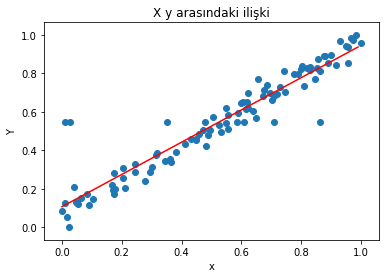

In [34]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(X.values, y.values)
plt.plot(random_x,
         lineer_regresyon.intercept_[0] +
         lineer_regresyon.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y regresyon analiz')

## Çoklu Regresyon Analizi

Eğer bağımsız değişkenler birden fazla olursa bu kez çoklu regresyon modeli kurmamız gerekir. Basit lineer regresyonda olduğu gibi katsayılar ve kesme terimi bulunduktan sonra regresyon modeli kurulabilir. Çoklu regresyonda modele alınacak değişkenlerin seçilmesi en önemli aşamayı oluşturur. 

Bu çalışmada Boston veri setini kullanarak bir çoklu regresyon analizi yapalım. Boston veri seti ile ilgili bilgiler [şu adresten](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) alınabilir.

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_X, boston_y = load_boston(return_X_y=True)

In [62]:
# Sütun isimleri
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [63]:
# X değerlerini pandas çerçevesine dönüştürelim
boston_X = pd.DataFrame(boston_X, columns=boston.feature_names)

In [64]:
# örnek veri seti
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
# veri setini inceleyelim
boston_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [66]:
# Tanımlayıcı istatistikleri
boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [67]:
# boş değer var mı
boston_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [68]:
# korelasyonlara bakalım.
boston_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [94]:
# En yüksek mutlak 5 korelasyonu sıralayalım
for col in boston.feature_names:
    en_yuksek_degerler = abs(boston_X.corr()[col]).nlargest(
        n=5)  # en yüksek korelasyona sahip 5 değeri alalım
    print(en_yuksek_degerler)
    # eğer 0.75'ten büyük değer varsa yazdır.
    for index, value in en_yuksek_degerler.items():
        if 1 > value >= 0.75:
            print(index, col, "değişkenleri yüksek korelasyona sahip: ", value)

CRIM     1.000000
RAD      0.625505
TAX      0.582764
LSTAT    0.455621
NOX      0.420972
Name: CRIM, dtype: float64
ZN       1.000000
DIS      0.664408
AGE      0.569537
INDUS    0.533828
NOX      0.516604
Name: ZN, dtype: float64
INDUS    1.000000
NOX      0.763651
TAX      0.720760
DIS      0.708027
AGE      0.644779
Name: INDUS, dtype: float64
NOX INDUS değişkenleri yüksek korelasyona sahip:  0.7636514469209145
CHAS       1.000000
PTRATIO    0.121515
DIS        0.099176
RM         0.091251
NOX        0.091203
Name: CHAS, dtype: float64
NOX      1.000000
DIS      0.769230
INDUS    0.763651
AGE      0.731470
TAX      0.668023
Name: NOX, dtype: float64
DIS NOX değişkenleri yüksek korelasyona sahip:  0.7692301132258261
INDUS NOX değişkenleri yüksek korelasyona sahip:  0.7636514469209145
RM         1.000000
LSTAT      0.613808
INDUS      0.391676
PTRATIO    0.355501
ZN         0.311991
Name: RM, dtype: float64
AGE      1.000000
DIS      0.747881
NOX      0.731470
INDUS    0.644779
LSTAT

şimdi yüksek korelasyona sahip özellikleri analizden çıkartalım. Neden mi çıkartıyoruz? [Şuradan](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e).  
- NOX INDUS
- DIS NOX
- RAD TAX

NOX ve RAD değişkenlerini analizden çıkaralım

In [95]:
boston_X = boston_X.drop(['NOX', 'RAD'], axis=1)

Şimdi çoklu regresyon analizini gerçekleştirelim.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(boston_X,
                                                    boston_y,
                                                    test_size=0.33,
                                                    random_state=42)

In [97]:
coklu_regresyon = LinearRegression()

In [98]:
coklu_regresyon.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
#katsayılar
print(coklu_regresyon.coef_.round(2))
print(coklu_regresyon.intercept_.round(2))

[-0.08  0.03 -0.05  3.45  4.16 -0.03 -1.18 -0.   -0.69  0.01 -0.57]
19.11


In [113]:
boston_y_predicted = coklu_regresyon.predict(X_test)

In [115]:
mean_squared_error(y_test, boston_y_predicted, squared=False)

4.827980073358347

In [116]:
r2_score(y_test, boston_y_predicted)

0.6919945689994251

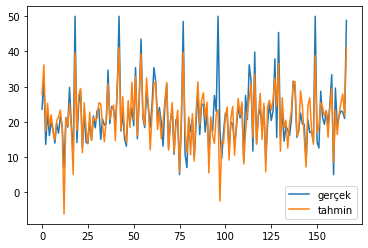

In [120]:
%matplotlib inline
plt.plot(y_test, label='gerçek')
plt.plot(boston_y_predicted, label='tahmin')
plt.legend()